## **Classification**

In [2]:
# import libraries and download data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

!wget $data -O data-week-3.csv

--2025-10-10 18:03:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  2.12MB/s    in 0.4s    

2025-10-10 18:03:58 (2.12 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [3]:
df = pd.read_csv('data-week-3.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# to view all columns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
# clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_').to_list()
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [6]:
# clean up values in columns too
categorical_cols = df.dtypes[df.dtypes == 'object'].index.to_list()
for col in categorical_cols:
    df[col] = df[col].str.replace(' ', '_').str.lower()
    
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
df.totalcharges.isnull().sum()

np.int64(11)

In [10]:
df.totalcharges = df.totalcharges.fillna(0)

In [11]:
df.totalcharges.isnull().sum()

np.int64(0)

In [12]:
df.churn.value_counts()

churn
no     5174
yes    1869
Name: count, dtype: int64

In [13]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [14]:
# replace/encode yes/no as numbers
df.churn = (df.churn == 'yes').astype(int)

In [15]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [16]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

### **Setting up the validation framework**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
len(df_full_train), len(df_test)

(5634, 1409)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [22]:
# reset indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
df_train.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0


In [24]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [25]:
df_train = df_train.drop('churn', axis=1)
df_val = df_val.drop('churn', axis=1)
df_test = df_test.drop('churn', axis=1)

In [26]:
df_val.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

### **EDA**

In [27]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [28]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [29]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [30]:
df_full_train.churn.value_counts(normalize=True) # to get the churn percentage

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [31]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [32]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [33]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [34]:
categorical = [
    'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'
]

In [35]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### **Feature Importance: Churn rate and risk ration**

In [36]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [37]:
# churn rate according to gender
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [38]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [39]:
global_churn_rate


np.float64(0.26996805111821087)

In [40]:
partner_churn = df_full_train[df_full_train.partner == 'yes'].churn.mean()
partner_churn

np.float64(0.20503330866025166)

In [41]:
no_partner_churn = df_full_train[df_full_train.partner == 'no'].churn.mean()
no_partner_churn

np.float64(0.3298090040927694)

In [42]:
global_churn_rate - partner_churn # (positive means less likely to churn - difference - feature importance)

np.float64(0.06493474245795922)

In [43]:
global_churn_rate - no_partner_churn # (negative means more likely to churn - feature importance - difference)

np.float64(-0.05984095297455855)

In [44]:
no_partner_churn / global_churn_rate # (grater than 1 means more likely to churn. Also feature importance - risk ratio)

np.float64(1.2216593879412643)

In [45]:
partner_churn / global_churn_rate # (< 1 means less likely to churn. this is risk ratio)

np.float64(0.7594724924338315)

In [46]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])

In [47]:
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate

df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [48]:
from IPython.display import display

In [49]:
for c in categorical_cols:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()

,mean,count,diff,risk
customerid,,,,
0002-orfbo,0.0,1,-0.269968,0.000000
0004-tlhlj,1.0,1,0.730032,3.704142
0011-igkff,1.0,1,0.730032,3.704142
0013-exchz,1.0,1,0.730032,3.704142
0013-mhzwf,0.0,1,-0.269968,0.000000
...,...,...,...,...
9987-lutyd,0.0,1,-0.269968,0.000000
9992-rramn,1.0,1,0.730032,3.704142
9992-ujoel,0.0,1,-0.269968,0.000000


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk
totalcharges,,,,
0.00,0.0,8,-0.269968,0.000000
18.80,0.0,1,-0.269968,0.000000
18.85,0.5,2,0.230032,1.852071
18.90,0.0,1,-0.269968,0.000000
19.00,0.0,1,-0.269968,0.000000
...,...,...,...,...
8547.15,0.0,1,-0.269968,0.000000
8564.75,0.0,1,-0.269968,0.000000
8594.40,0.0,1,-0.269968,0.000000


,mean,count,diff,risk
churn,,,,
0,0.0,4113,-0.269968,0.000000
1,1.0,1521,0.730032,3.704142


### **Feature Importance - Mutual Information**

**Mutual information** is a core concept in information theory that is also widely used in machine learning to quantify the relationship between two random variables. 

**Definition:**
- Mutual information measures **how much information one variable contains about another**.
- It is the **reduction in uncertainty** of one random variable due to the knowledge of the other.
- Formally, the mutual information $$ I(X; Y) $$ between random variables $$ X $$ and $$ Y $$ is defined as:

$$
I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log \frac{p(x, y)}{p(x)p(y)}
$$

where:
- $$ p(x, y) $$: Joint probability of $$ X $$ and $$ Y $$
- $$ p(x) $$ and $$ p(y) $$: Marginal probabilities of $$ X $$, $$ Y $$

**Key Points:**
- Mutual information is always **non-negative**.
- $$I(X;Y) = 0$$ if and only if $$X$$ and $$Y$$ are independent (no information shared).
- It is **symmetric**: $$I(X;Y) = I(Y;X)$$.
- It captures all kinds of dependencies (not limited to linear correlation).

**In machine learning, mutual information is often used for:**
- **Feature selection:** Identifying features that provide the most information about the target variable.
- **Measuring dependency:** Detecting statistical relationships between variables, useful in clustering or analyzing data distributions.
- **Loss functions:** Sometimes used in generative models or unsupervised learning.

**Intuitive Example:**  
If you want to know how much knowing the value of feature $$X$$ reduces the uncertainty about the target label $$Y$$, mutual information quantifies that. A high mutual information means $$X$$ is very informative about $$Y$$.

**Summary:**  
Mutual information provides a powerful, general measure for the dependency between variables and is widely used for understanding, selecting, and engineering features in machine learning workflows.


In [50]:
from sklearn.metrics import mutual_info_score

In [51]:
mutual_info_score(df_full_train.churn, df_full_train.contract) # syntax: mutual_info_score(target_variable, variable_to_compare). The order of the arguments don't matter


0.0983203874041556

In [52]:
mutual_info_score(df_full_train.gender, df_full_train.churn) # syntax: mutual_info_score(target_variable, variable_to_compare). The order of the arguments don't matter


0.0001174846211139946

In [53]:
mutual_info_score(df_full_train.partner, df_full_train.churn) # syntax: mutual_info_score(target_variable, variable_to_compare). The order of the arguments don't matter


0.009967689095399745

In [54]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [55]:
categorical_cols

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [56]:
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [57]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### **Feature Importance: Correlation** (for numerical variables)

**Correlation** measures the degree of importance of one variable in relation to another variable. It measures how two variables change in relation to each other. 

It is denoted by the letter *r* - this is referred to as the *Pearson correlation coefficient*. This value ranges between  $-1 \leq r \leq 1$

In [58]:
# select numerical cols and check their correlation with churn
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [59]:
df_full_train[df_full_train.tenure <= 2].churn.mean() # people who have been with the company for just two months or less

np.float64(0.5953420669577875)

In [60]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean() # between 2 and 12

np.float64(0.3994413407821229)

In [61]:
df_full_train[df_full_train.tenure > 12].churn.mean() # greater than 12 months

np.float64(0.17634908339788277)

In [62]:
# monthly charges
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [63]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [64]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

In [65]:
df_full_train.totalcharges

0        258.35
1       3160.55
2       4681.75
3       6300.85
4       2044.75
         ...   
5629     918.60
5630    1189.90
5631    2979.50
5632     114.10
5633    1114.85
Name: totalcharges, Length: 5634, dtype: float64

In [66]:
# totalcharges
df_full_train[df_full_train.totalcharges <= 250].churn.mean()

np.float64(0.46918123275068996)

In [67]:
df_full_train[(df_full_train.totalcharges > 250) & (df_full_train.totalcharges <= 3000)].churn.mean()

np.float64(0.2600072124053372)

In [68]:
df_full_train[df_full_train.totalcharges > 3000].churn.mean()

np.float64(0.16347237880496054)

In [69]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

### **One-hot Encoding** (for categorical variables)

In [70]:
from sklearn.feature_extraction import DictVectorizer

In [71]:
dv = DictVectorizer(sparse=False)

In [72]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') # convert each column into a dict using orient=records
X_train = dv.fit_transform(train_dicts) # produces a sparse matrix when there are many zeros, unless sparse set to False to get a numoy array

In [73]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [74]:
X_train.shape, X_val.shape

((4225, 45), (1409, 45))

In [75]:
dv.get_feature_names_out() # take note of this and share in the FAQ. Instead of get_feature_name, current sklearn version uses get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

### **Logistic Regression**

In [76]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [77]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [78]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

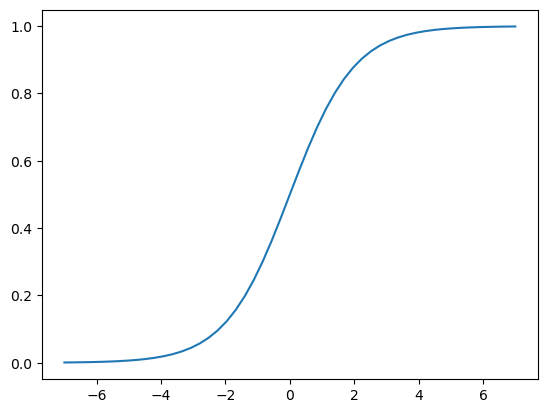

In [79]:
plt.plot(z, sigmoid(z)) # in the +ve part, it always tries to reach 1, in the -ve part, it always tries to reach 0

In [80]:
# mathematical implementation of logistic regression
def logistic_regression(xi):
    result = w0
    
    for i in range(len(w)):
        score = score + x[i] + w[i]
        
    result = sigmoid(score)
    
    return result

### **Training Logistic Regression with Scikit Learn**

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)

/home/dev_ampofo/miniconda3/envs/ml-zoomcamp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [83]:
lr.coef_[0].round(3) # w0

array([ 0.469, -0.175, -0.403, -0.027, -0.081,  0.064, -0.09 , -0.082,
       -0.035, -0.074, -0.334,  0.316, -0.09 ,  0.004, -0.26 ,  0.139,
        0.012,  0.064, -0.09 , -0.082,  0.267, -0.09 , -0.285, -0.235,
        0.126, -0.164,  0.055, -0.087, -0.033,  0.075, -0.063,  0.139,
       -0.248,  0.215, -0.118, -0.09 ,  0.1  , -0.07 , -0.09 ,  0.051,
        0.216, -0.09 , -0.234, -0.07 ,  0.   ])

In [84]:
lr.intercept_[0] # intercept

np.float64(-0.1100666540412934)

In [85]:
lr.predict(X_train) # hard preds cuz we already have the exact labels

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [86]:
y_pred = lr.predict_proba(X_train)[:, 1] # these are the scores not probability, hence soft prediction
# we take only the first column because those are the positive class (1 - churn)

y_pred

array([0.0943497 , 0.68185467, 0.63667289, ..., 0.52698947, 0.0421786 ,
       0.70115625], shape=(4225,))

In [87]:
y_pred_val = lr.predict_proba(X_val)[:, 1]
y_pred_val

array([0.00889784, 0.20041467, 0.20897583, ..., 0.13587385, 0.80120074,
       0.83857205], shape=(1409,))

In [88]:
churn_decision = (y_pred_val >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [89]:
df_val[churn_decision] # all the people who will churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [90]:
# get customer id for churns
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 313, dtype: object

In [91]:
# evaluate model
print((y_val == churn_decision).mean()) # getting accuracy
churn_decision.astype(int)

0.8034066713981547


array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [95]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_val
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [97]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [99]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

In [98]:
df_pred

,probability,prediction,actual,correct
0,0.008898,0,0,True
1,0.200415,0,0,True
2,0.208976,0,0,True
3,0.546329,1,1,True
4,0.211169,0,0,True
...,...,...,...,...
1404,0.311383,0,0,True
1405,0.039068,0,1,False
1406,0.135874,0,0,True
1407,0.801201,1,1,True


### **Model Interpretation**

In [104]:
lr.coef_[0].round(3)

array([ 0.469, -0.175, -0.403, -0.027, -0.081,  0.064, -0.09 , -0.082,
       -0.035, -0.074, -0.334,  0.316, -0.09 ,  0.004, -0.26 ,  0.139,
        0.012,  0.064, -0.09 , -0.082,  0.267, -0.09 , -0.285, -0.235,
        0.126, -0.164,  0.055, -0.087, -0.033,  0.075, -0.063,  0.139,
       -0.248,  0.215, -0.118, -0.09 ,  0.1  , -0.07 , -0.09 ,  0.051,
        0.216, -0.09 , -0.234, -0.07 ,  0.   ])

In [102]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [106]:
dict(zip(dv.get_feature_names_out(), lr.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.469),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.403),
 'dependents=no': np.float64(-0.027),
 'dependents=yes': np.float64(-0.081),
 'deviceprotection=no': np.float64(0.064),
 'deviceprotection=no_internet_service': np.float64(-0.09),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.035),
 'gender=male': np.float64(-0.074),
 'internetservice=dsl': np.float64(-0.334),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.09),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.26),
 'multiplelines=no_phone_service': np.float64(0.139),
 'multiplelines=yes': np.float64(0.012),
 'onlinebackup=no': np.float64(0.064),
 'onlinebackup=no_internet_service': np.float64(-0.09),
 'onlinebackup=yes': np.float64(-0.082),
 'onlinesecurity=no': np.float64(0.267),
 'onlinesecurity=no_internet_service': np.float64(-0.09),
 'onlinesecurity=yes': np

In [110]:
small = ['contract', 'tenure', 'monthlycharges']

In [111]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [112]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [113]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [114]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [115]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [116]:
X_train_small = dv_small.transform(dicts_train_small)

In [117]:
lr_small = LogisticRegression()
lr_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [122]:
w0 = lr_small.intercept_[0]
w0.round(3)

np.float64(-2.478)

In [120]:
w = lr_small.coef_[0]
w

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [121]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [126]:
raw_score = -2.478 + 0.971 + 50 * 0.027 + 5 * (-0.036)
raw_score

-0.337

In [127]:
sigmoid(_)

np.float64(0.41653839648976954)

### **Using the model**

In [128]:
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')

In [129]:
full_train_dicts

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [130]:
dv_full = DictVectorizer(sparse=False)
X_train_full = dv_full.fit_transform(full_train_dicts)

In [131]:
y_train_full = df_full_train.churn.values

In [132]:
lr_full = LogisticRegression()
lr_full.fit(X_train_full, y_train_full)

/home/dev_ampofo/miniconda3/envs/ml-zoomcamp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [133]:
test_dicts_full = df_test[categorical+numerical].to_dict(orient='records')
X_test_full = dv_full.transform(test_dicts_full)

In [135]:
y_pred_full = lr_full.predict_proba(X_test_full)[:, 1]

In [136]:
churn_des_full = (y_pred_full >= 0.5)

In [137]:
(churn_des_full == y_test).mean()

np.float64(0.8147622427253371)

In [154]:
# use the model
cust_1400 = test_dicts_full[1400]
cust_1400

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'one_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 57,
 'monthlycharges': 74.6,
 'totalcharges': 4368.95}

In [155]:
# transform customer
X_cust_1400 = dv_full.transform([cust_1400])
X_cust_1400.shape

# churn_decision_cust_1400 = (y_pred_cust_1400 >= 0.5)

(1, 45)

In [158]:
y_pred_cust_1400 = lr_full.predict_proba(X_cust_1400)[0, 1]
y_pred_cust_1400

np.float64(0.02712387952418235)

In [159]:
y_test[1400]

np.int64(0)

In [161]:
# customer who will churn
churn_customer = test_dicts_full[-1]
churn_customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [162]:
X_churn_customer = dv_full.transform([churn_customer])
y_pred_churn_customer = lr_full.predict_proba(X_churn_customer)[0, 1]

In [163]:
y_pred_churn_customer

np.float64(0.6371524644273053)